In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# If you want the plots to appear inline in a Jupyter notebook, uncomment:
# %matplotlib inline

# Load the data
df = pd.read_csv('uboats.csv')

# Optional: improve the style using seaborn
sns.set_style("whitegrid")


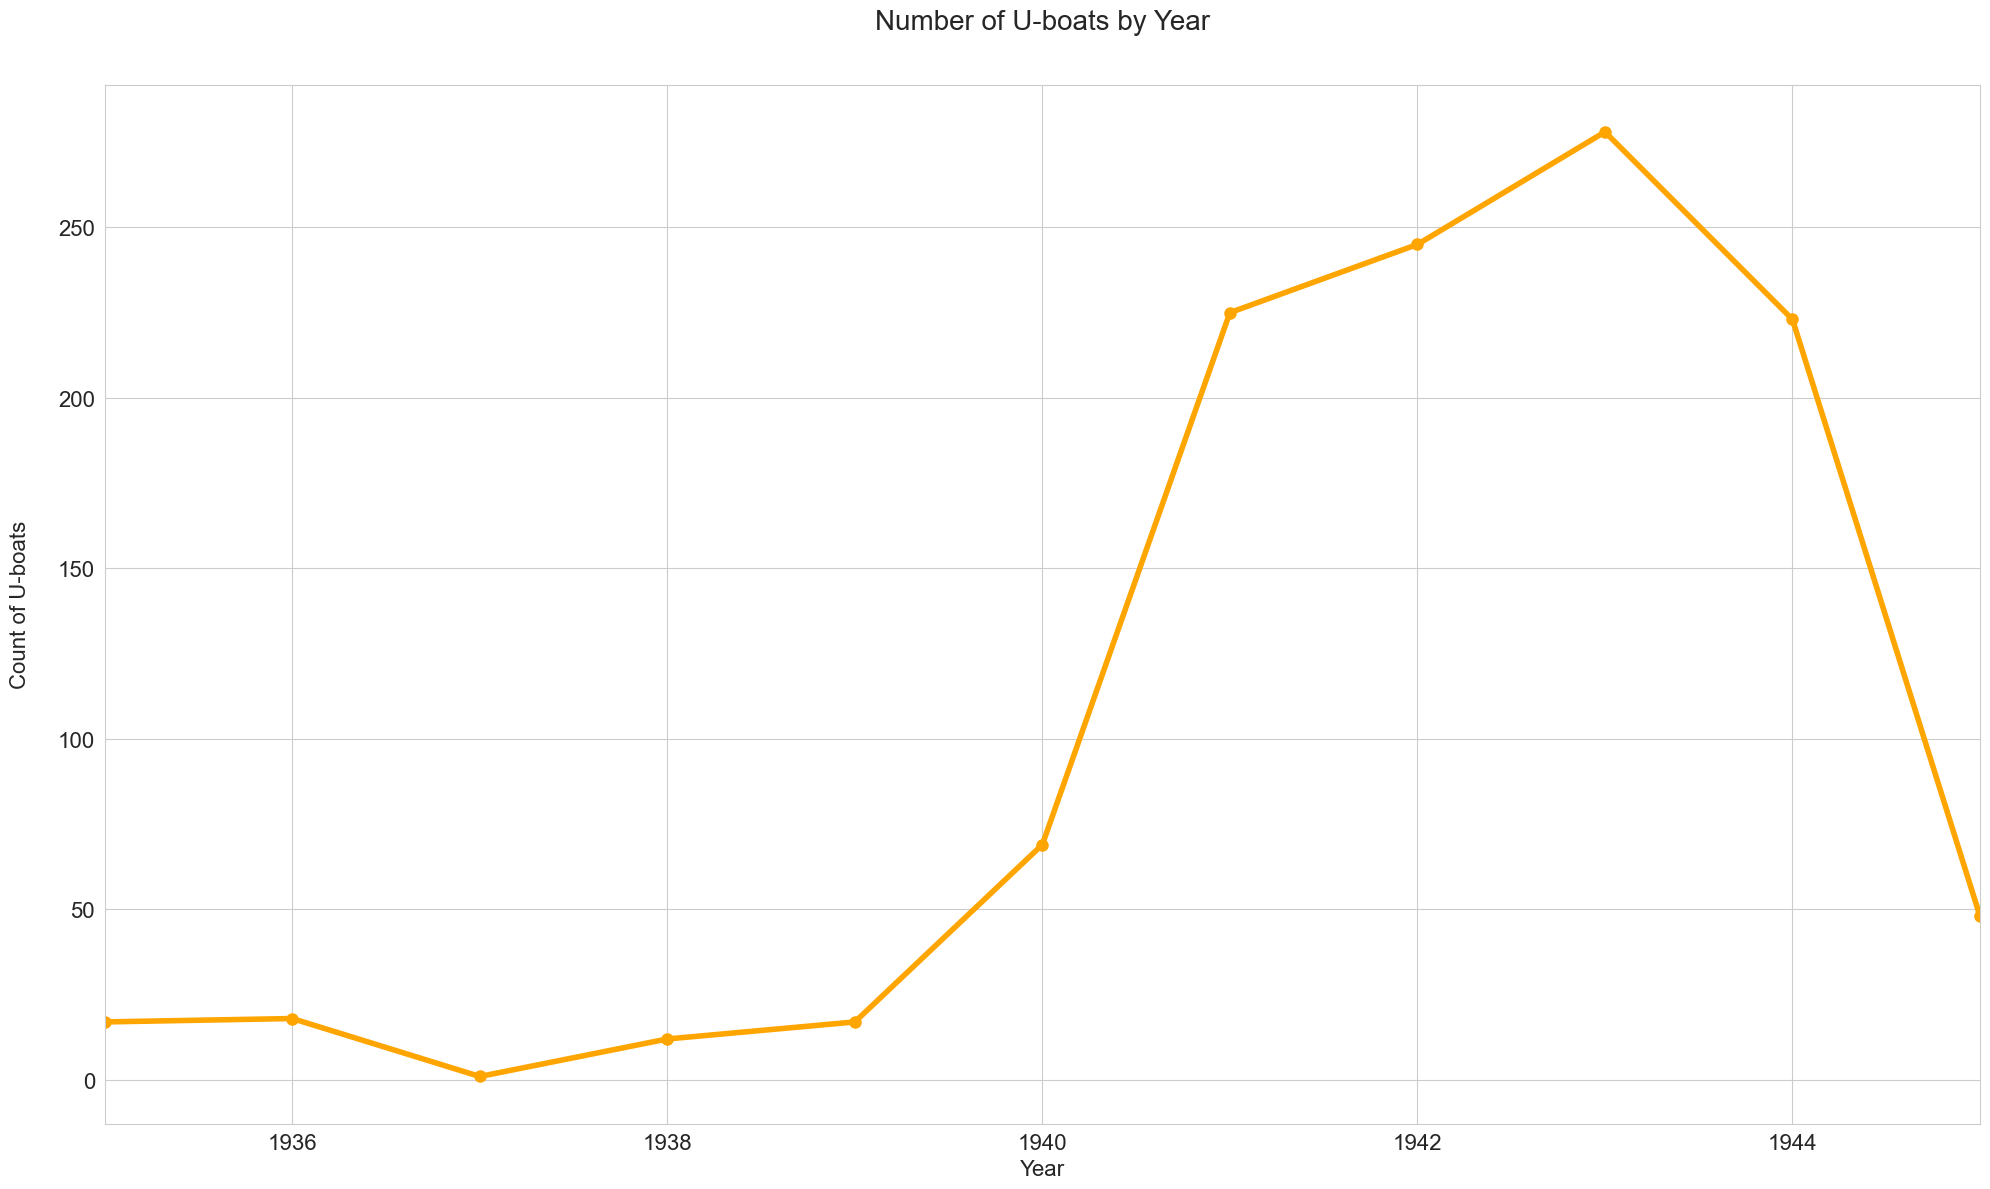

In [38]:
plt.figure(figsize=(20, 12))
year_counts = df['Year'].value_counts().sort_index()

year_counts.plot(kind='line', color='orange', marker='o', markersize=8, linewidth=4)
plt.title("Number of U-boats by Year", fontsize=20, pad=40)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Count of U-boats", fontsize=16, labelpad=20)
# make y axis values font bigger
plt.yticks(fontsize=16)
plt.xlim(1935, 1945)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.show()


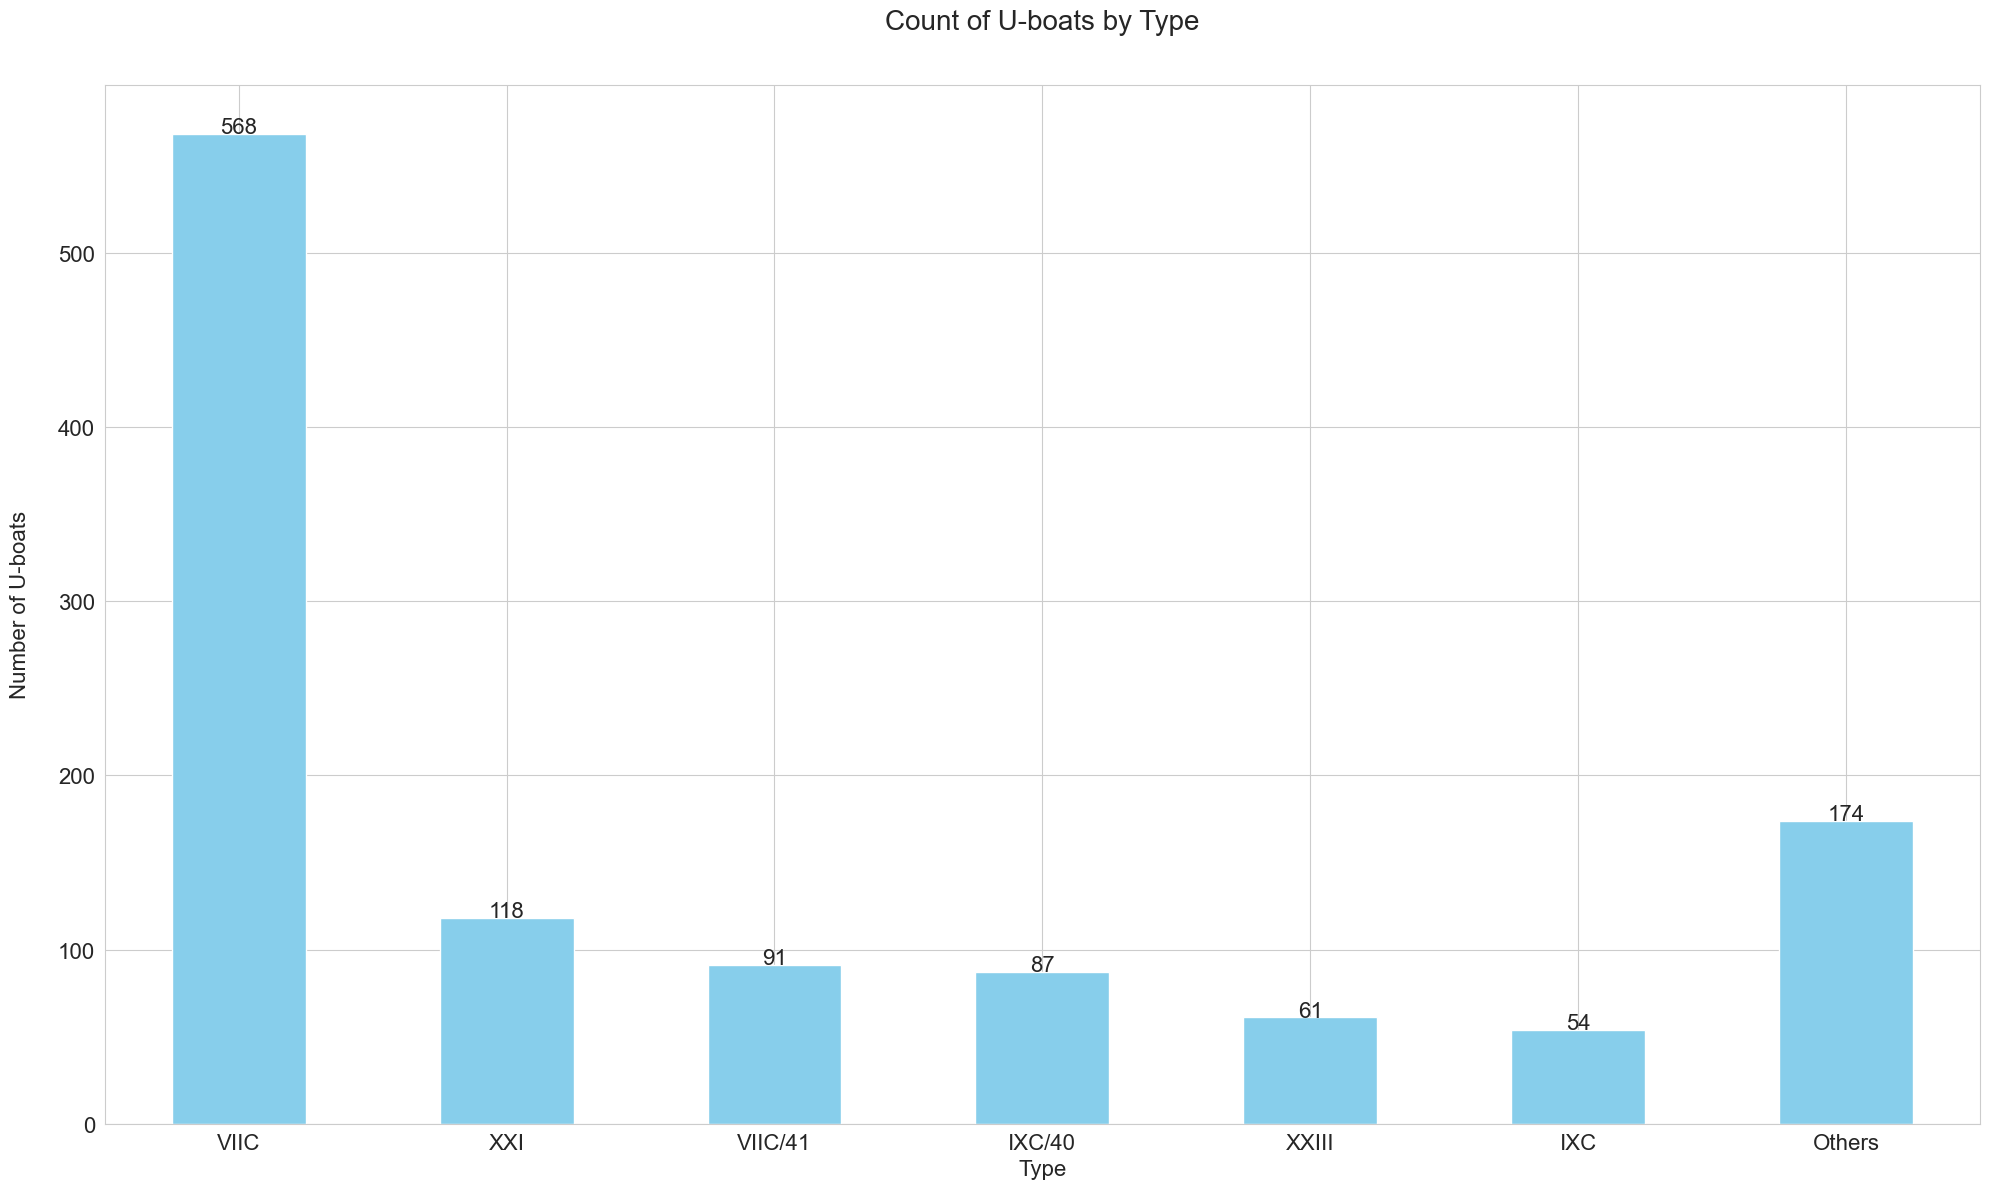

In [39]:
type_threshold = 30

type_counts = df['Type'].value_counts()
# Separate out the ones below threshold
type_counts_main = type_counts[type_counts >= type_threshold]
others_count = type_counts[type_counts < type_threshold].sum()

# Create a new Series with "Others"
type_counts_filtered = type_counts_main.copy()
if others_count > 0:
    type_counts_filtered['Others'] = others_count

plt.figure(figsize=(20, 12))
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
type_counts_filtered.plot(kind='bar', color='skyblue')
plt.title("Count of U-boats by Type", fontsize=20, pad=40)
plt.xlabel("Type", fontsize=16)
plt.ylabel("Number of U-boats", fontsize=16, labelpad=20)
plt.xticks(rotation=360)
# add numeric values over bars
for i, v in enumerate(type_counts_filtered):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=16)
plt.tight_layout()
plt.show()

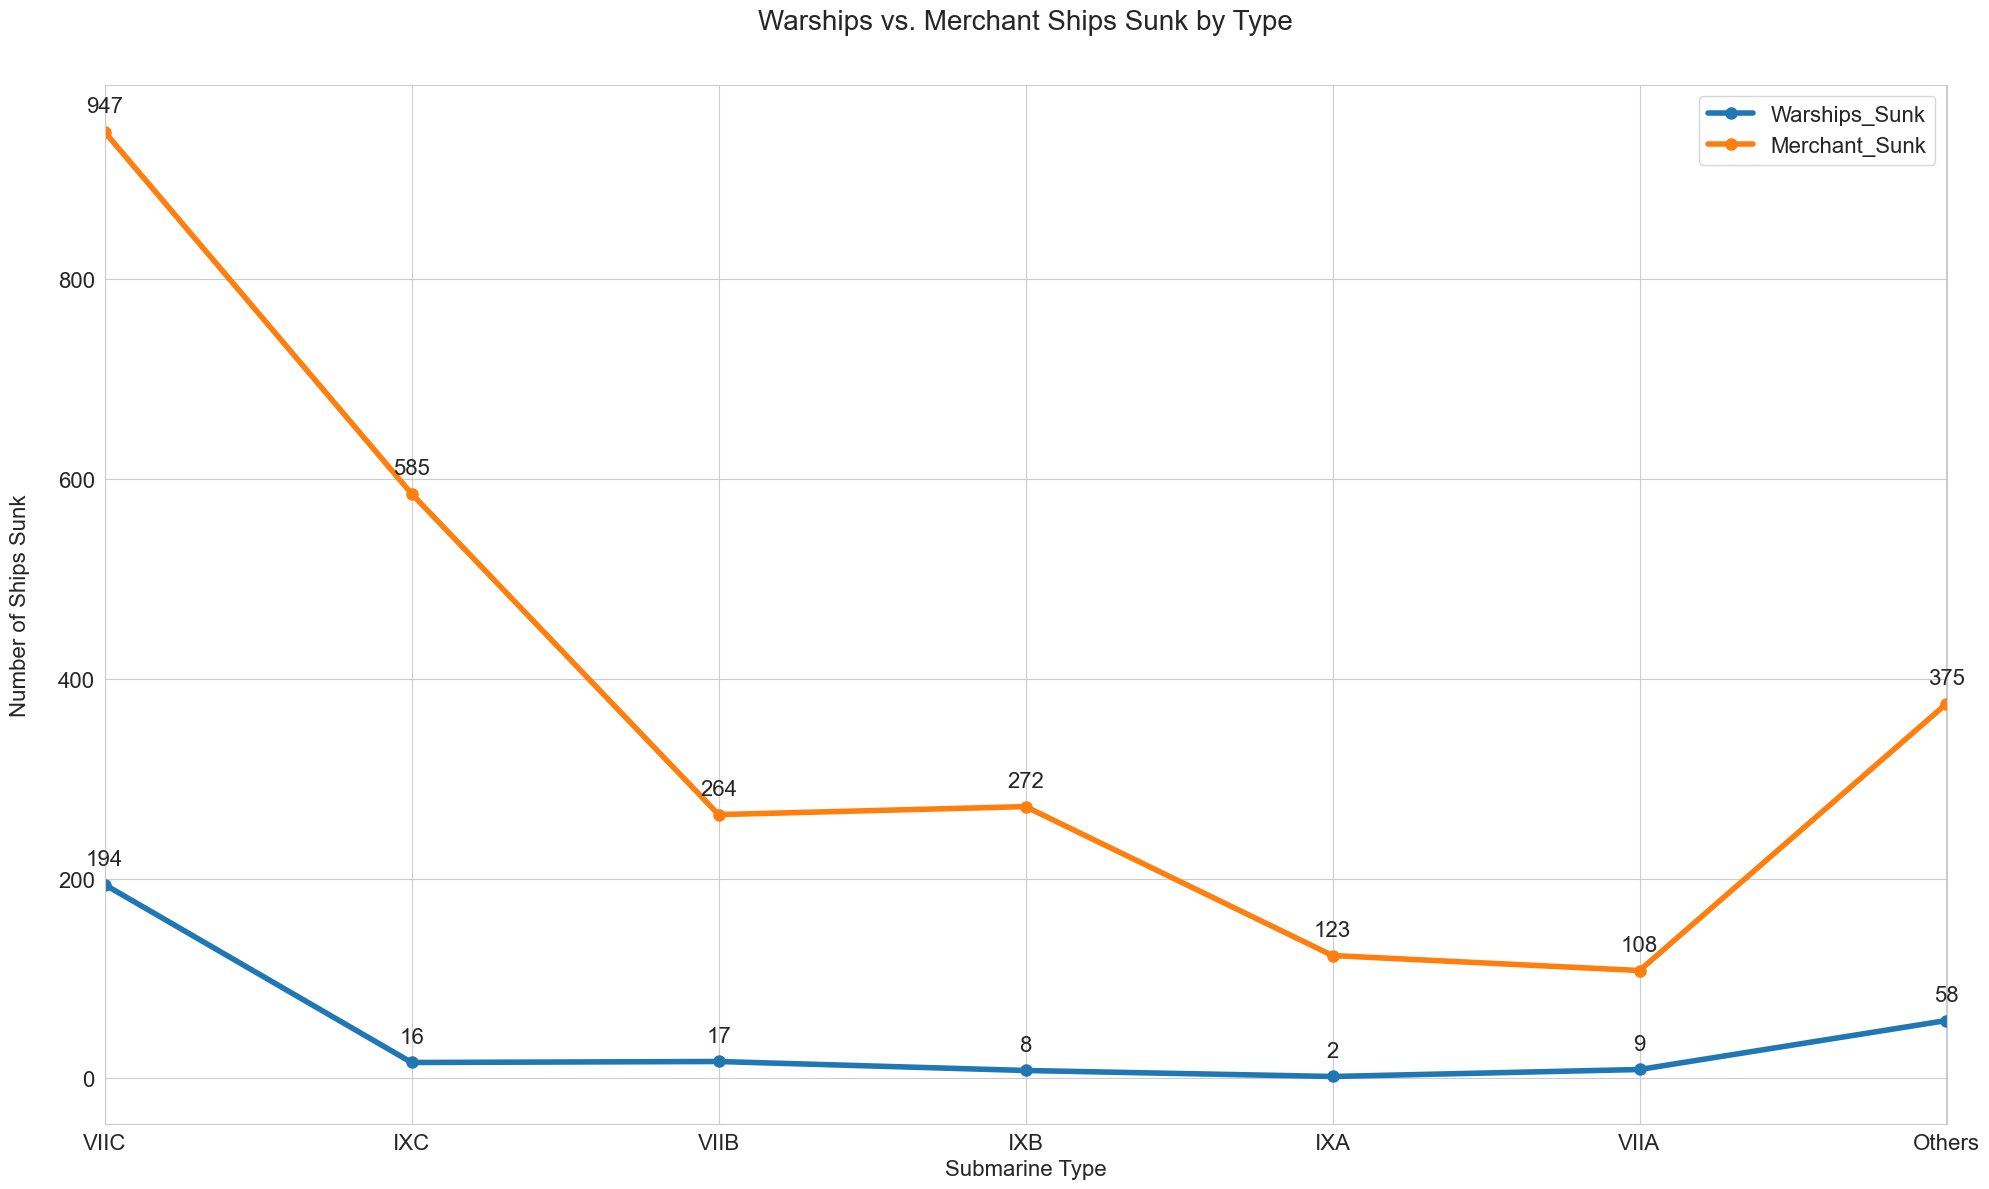

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert columns to numeric
df['Warships_sunk_n_total_loss_No'] = pd.to_numeric(df['Warships_sunk_n_total_loss_No'], errors='coerce').fillna(0)
df['Merchant_Ships_sunk_No'] = pd.to_numeric(df['Merchant_Ships_sunk_No'], errors='coerce').fillna(0)

# Group by 'Type' and sum Warships + Merchant Ships
grouped_data = df.groupby('Type').agg({
    'Warships_sunk_n_total_loss_No': 'sum',
    'Merchant_Ships_sunk_No': 'sum'
})

# Rename columns
grouped_data.columns = ['Warships_Sunk', 'Merchant_Sunk']

# Apply threshold
sunk_threshold = 100
grouped_data['Total_Sunk'] = grouped_data['Warships_Sunk'] + grouped_data['Merchant_Sunk']

above_threshold = grouped_data[grouped_data['Total_Sunk'] >= sunk_threshold]
below_threshold = grouped_data[grouped_data['Total_Sunk'] < sunk_threshold]

# Sum values below threshold into "Others"
if not below_threshold.empty:
    others_warships = below_threshold['Warships_Sunk'].sum()
    others_merchant = below_threshold['Merchant_Sunk'].sum()

    others_row = pd.DataFrame({
        'Warships_Sunk': [others_warships],
        'Merchant_Sunk': [others_merchant]
    }, index=['Others'])

    final_data = pd.concat([above_threshold, others_row])
else:
    final_data = above_threshold

# Sort by total sunk
final_data = final_data.sort_values(by='Total_Sunk', ascending=False)

# FIX: Explicitly set x-ticks to category labels
plt.figure(figsize=(20, 12))
ax = plt.gca()  # Get current axis
final_data[['Warships_Sunk', 'Merchant_Sunk']].plot(kind='line', marker='o', ax=ax, markersize=8, linewidth=4)

plt.title("Warships vs. Merchant Ships Sunk by Type", fontsize=20, pad=40)
plt.xlabel("Submarine Type", fontsize=16)
plt.ylabel("Number of Ships Sunk", fontsize=16, labelpad=20)

# Set correct x-ticks to avoid weird dots
ax.set_xticks(range(len(final_data.index)))  # Position ticks correctly
ax.set_xticklabels(final_data.index, rotation=0)  # Show correct category labels

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=16)

# Add numeric values over lines, add +0.5 to y values for better visibility
for i, (warships, merchant) in enumerate(zip(final_data['Warships_Sunk'], final_data['Merchant_Sunk'])):
    plt.text(i, warships + 20, str(int(warships)), ha='center', fontsize=16)
    plt.text(i, merchant + 20, str(int(merchant)), ha='center', fontsize=16)

plt.xlim(0, len(final_data.index) - 1)  # Adjust x-limits to fit the data
plt.tight_layout()
plt.show()


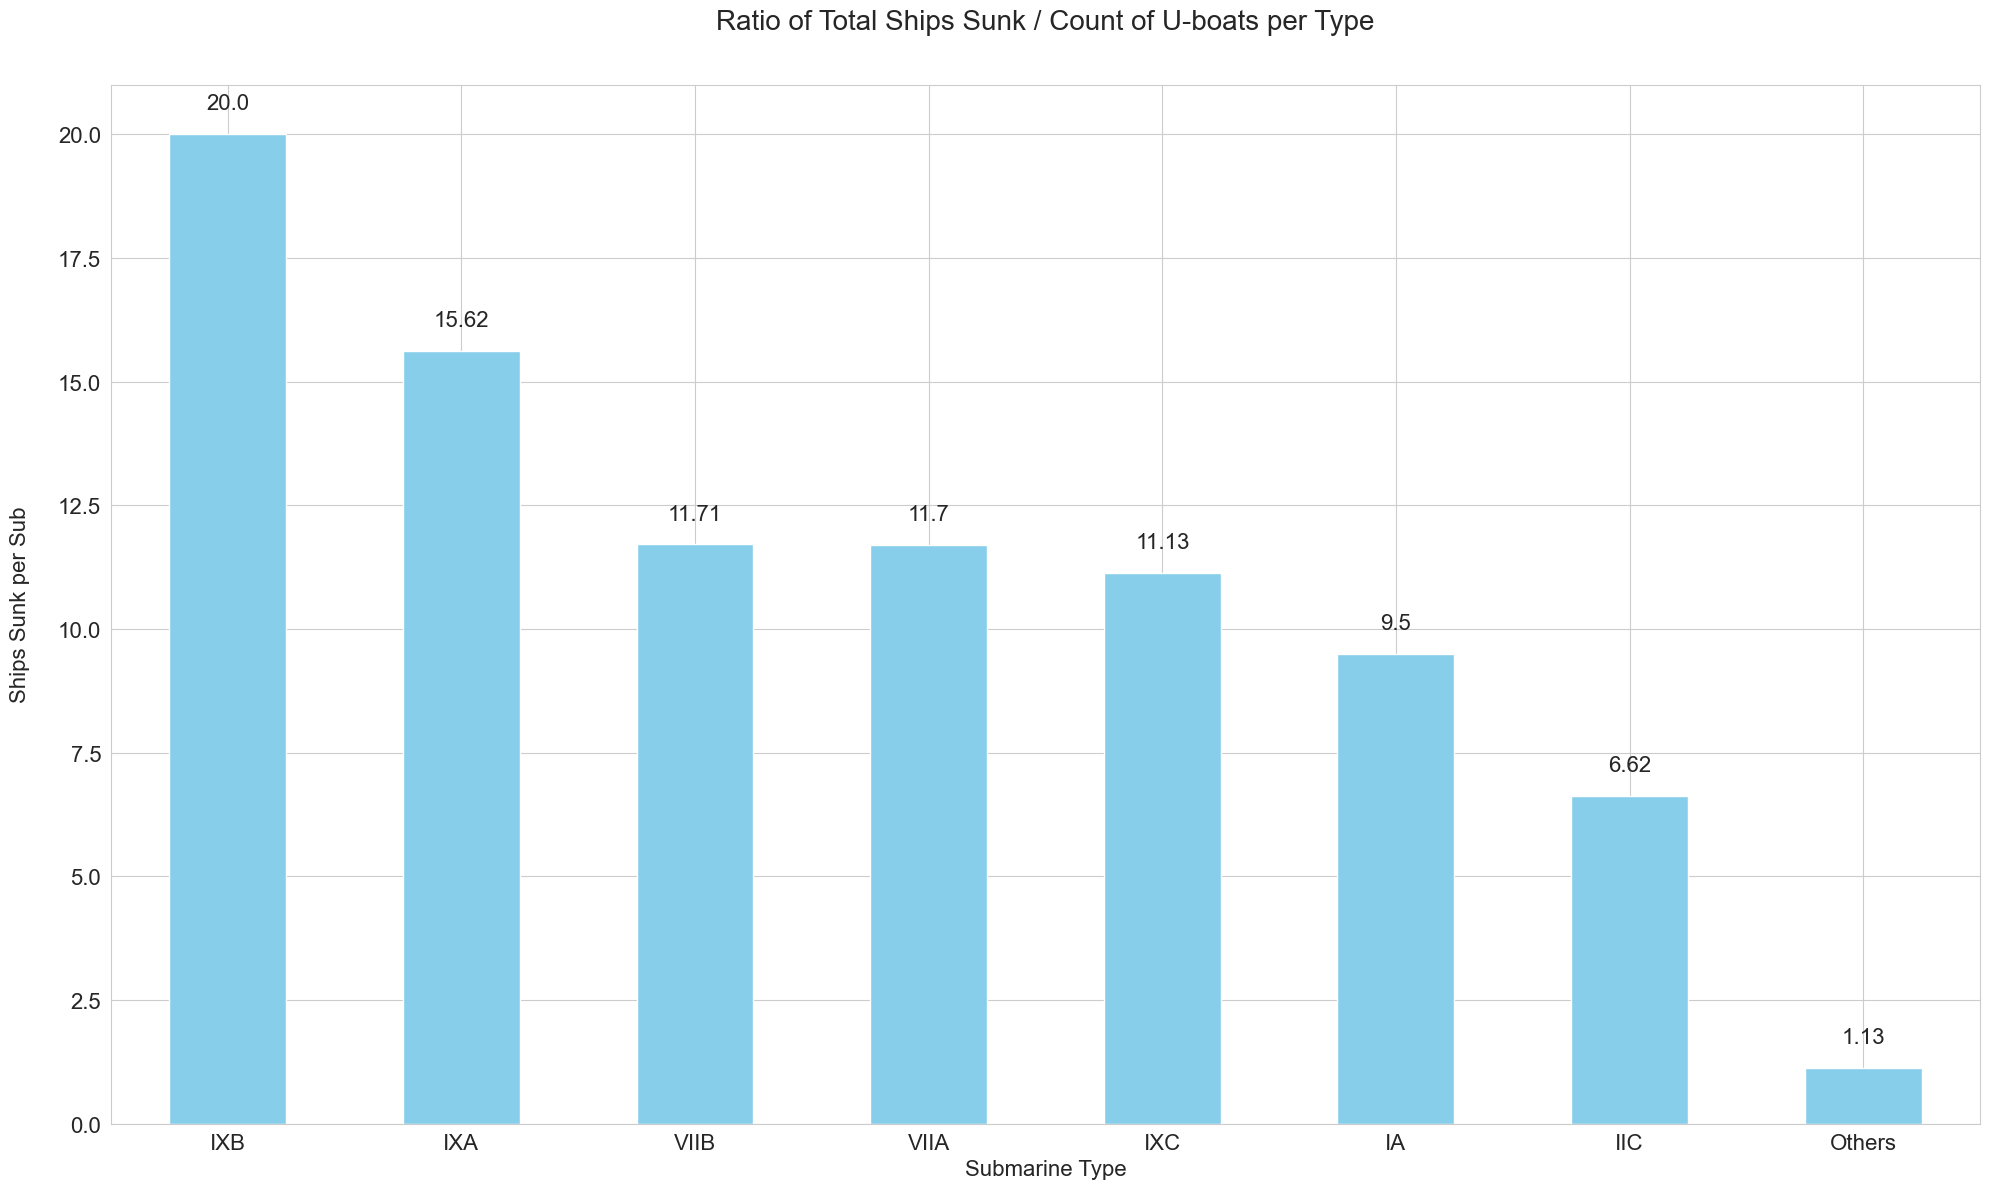

In [52]:
# Compute the ratio (Total Ships Sunk) / (Count of U-boats)
type_counts = df['Type'].value_counts()
total_sunk_per_type = df.groupby('Type').agg({
    'Warships_sunk_n_total_loss_No': 'sum',
    'Merchant_Ships_sunk_No': 'sum'
}).sum(axis=1)

# Compute the ratio and handle missing values
ratio = total_sunk_per_type / type_counts
ratio = ratio.fillna(0).sort_values(ascending=False)

# Set a threshold: If a type appears in fewer than 'ratio_threshold' cases, group it into "Others"
ratio_threshold = 5  # Adjust this value as needed

# Separate types above and below the threshold
ratio_main = ratio[ratio >= ratio_threshold]

others_ratio = ratio[ratio < ratio_threshold].sum() / len(ratio[ratio < ratio_threshold])

# Create a new Series for plotting
ratio_filtered = ratio_main.copy()
if others_ratio > 0:
    ratio_filtered['Others'] = others_ratio

# Plot
plt.figure(figsize=(20, 12))
ratio_filtered.plot(kind='bar', color='skyblue')
plt.title("Ratio of Total Ships Sunk / Count of U-boats per Type", fontsize=20, pad=40)
plt.xlabel("Submarine Type", fontsize=16)
plt.ylabel("Ships Sunk per Sub", fontsize=16, labelpad=20)
plt.xticks(rotation=360, fontsize=16)
plt.yticks(fontsize=16)

# Add numeric values over bars
for i, v in enumerate(ratio_filtered):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', fontsize=16)


plt.tight_layout()
plt.show()


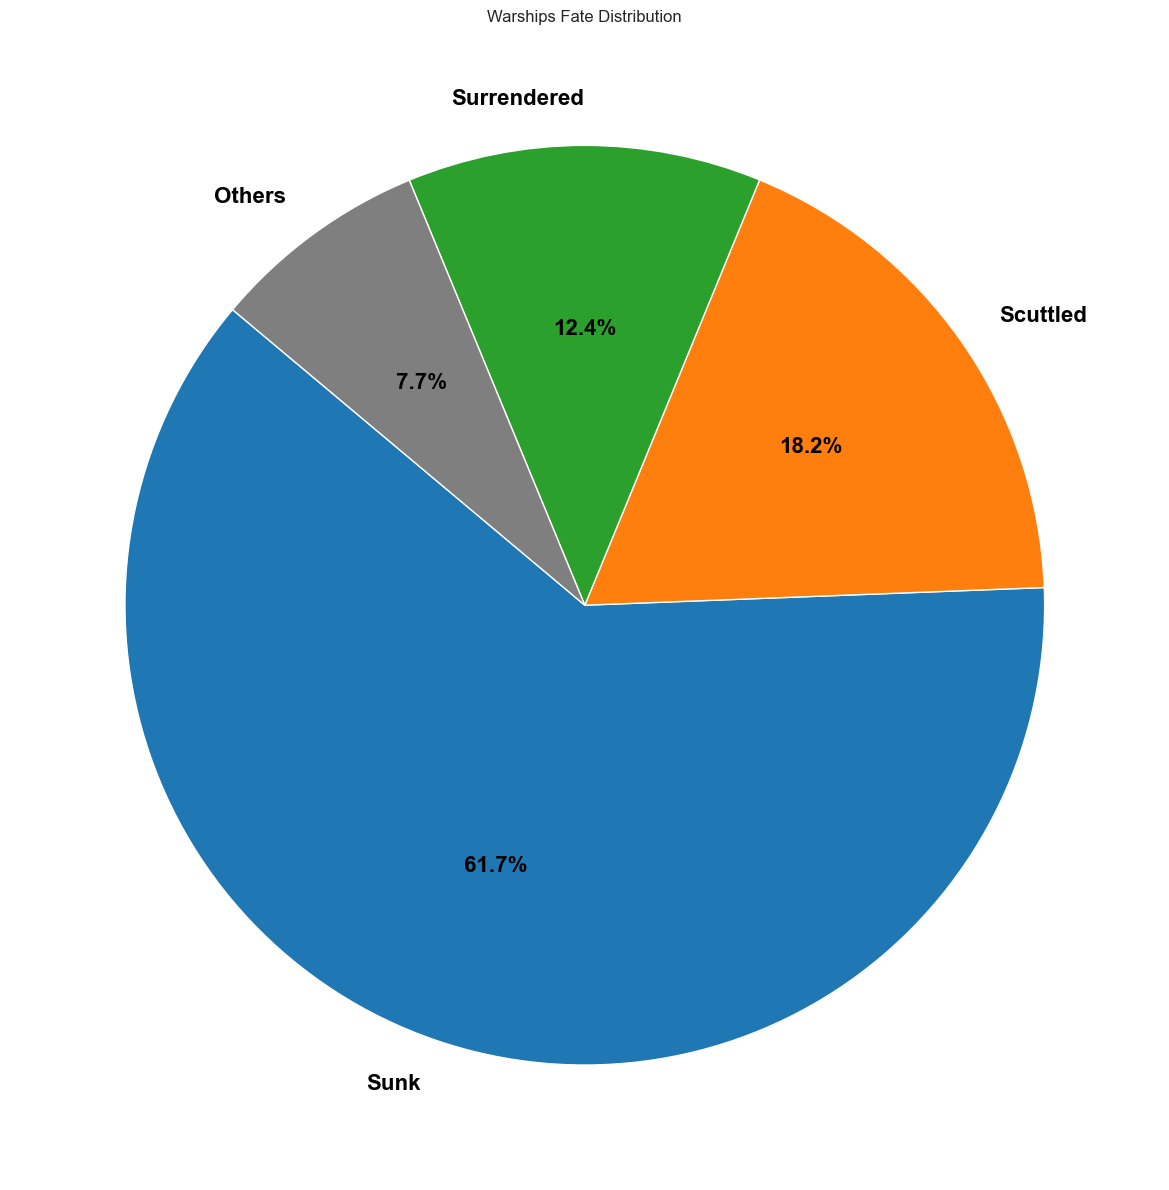

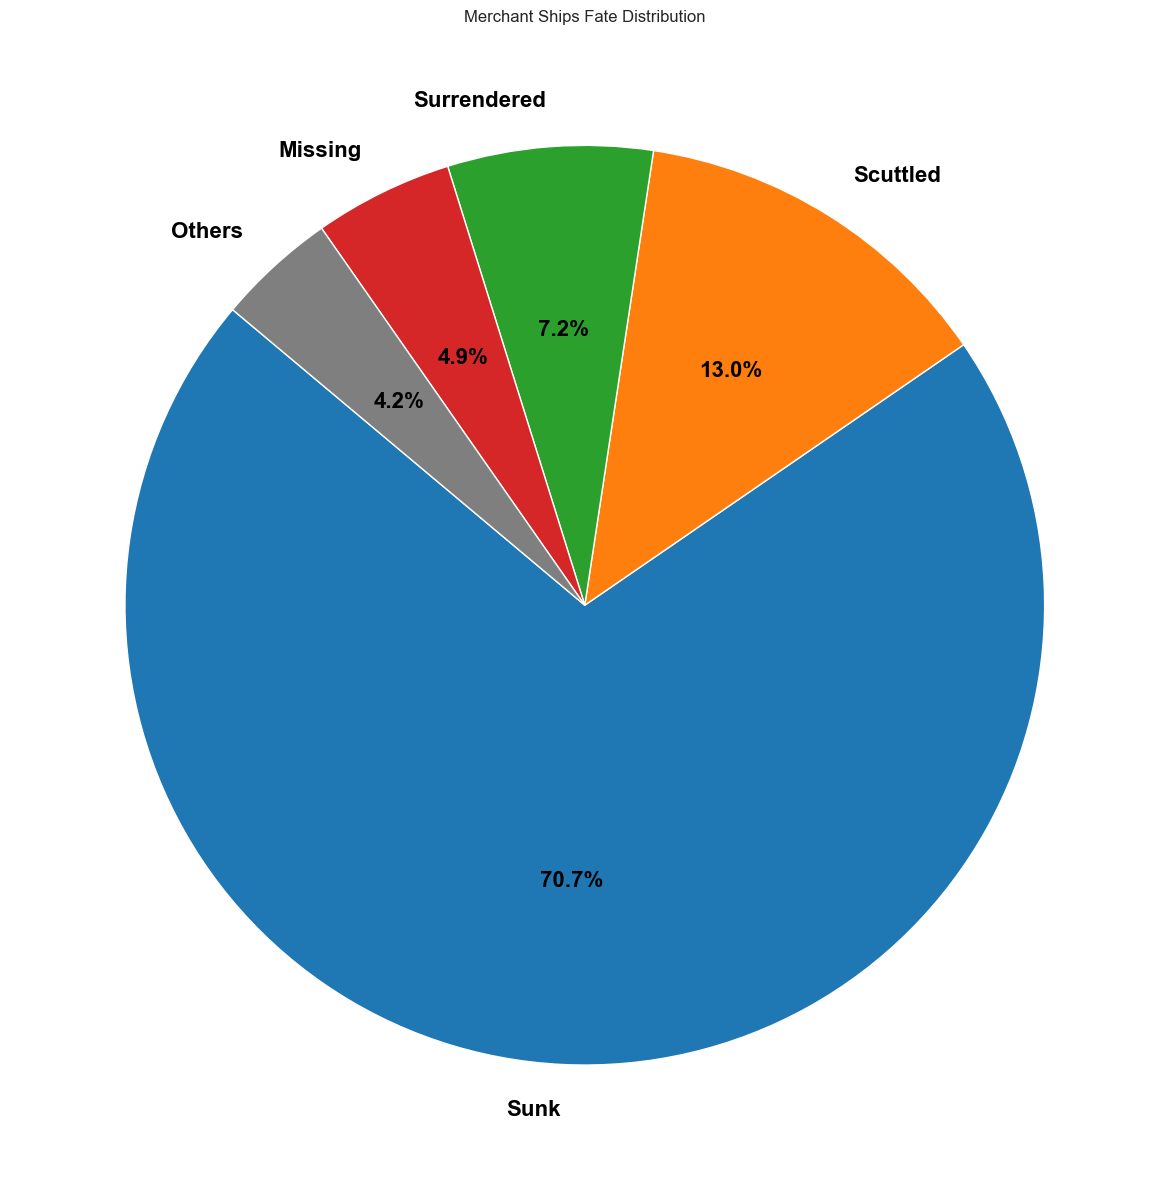

In [56]:
import matplotlib.pyplot as plt

# Define a dictionary mapping each Fate_Event label to a specific color
fate_color_map = {
    "Sunk": "#1f77b4",  # Blue
    "Scuttled": "#ff7f0e",  # Orange
    "Surrendered": "#2ca02c",  # Green
    "Missing": "#d62728",  # Red
    "Others": "#7f7f7f",  # Gray
    # Add more fate labels here if needed...
}

# Threshold
fate_threshold = 20

# 1) WARSHIPS
df_warships = df[df['Warships_sunk_n_total_loss_No'] > 0]
warship_fate_counts = df_warships['Fate_Event'].value_counts()
warship_fate_main = warship_fate_counts[warship_fate_counts >= fate_threshold]
others_warship = warship_fate_counts[warship_fate_counts < fate_threshold].sum()

warship_fate_filtered = warship_fate_main.copy()
if others_warship > 0:
    warship_fate_filtered['Others'] = others_warship

# Create a color list for warship_fate_filtered, in label order
warship_labels = warship_fate_filtered.index
warship_colors = [
    fate_color_map[label] if label in fate_color_map else "#c7c7c7"
    for label in warship_labels
]

plt.figure(figsize=(20, 12))
plt.pie(
    warship_fate_filtered,
    labels=warship_labels,
    colors=warship_colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 16, 'weight': 'bold', 'color': 'black'},
)
plt.title("Warships Fate Distribution")
plt.tight_layout()
plt.show()

# 2) MERCHANT SHIPS
df_merchants = df[df['Merchant_Ships_sunk_No'] > 0]
merchant_fate_counts = df_merchants['Fate_Event'].value_counts()
merchant_fate_main = merchant_fate_counts[merchant_fate_counts >= fate_threshold]
others_merchant = merchant_fate_counts[merchant_fate_counts < fate_threshold].sum()

merchant_fate_filtered = merchant_fate_main.copy()
if others_merchant > 0:
    merchant_fate_filtered['Others'] = others_merchant

# Create a color list for merchant_fate_filtered, in label order
merchant_labels = merchant_fate_filtered.index
merchant_colors = [
    fate_color_map[label] if label in fate_color_map else "#c7c7c7"
    for label in merchant_labels
]

plt.figure(figsize=(20, 12))
plt.pie(
    merchant_fate_filtered,
    labels=merchant_labels,
    colors=merchant_colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 16, 'weight': 'bold', 'color': 'black'},
)
plt.title("Merchant Ships Fate Distribution")
plt.tight_layout()
plt.show()
